In [1]:
import os
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,LSTM
from tensorflow.keras import preprocessing
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 원본 IMDB 데이터 읽기
directory='./data/aclImdb/aclImdb/test'
x=[];y=[]
for c in ['neg','pos']:
    curr=os.path.join(directory,c)
    for fname in os.listdir(curr):
        if fname[-4:]=='.txt':
            f=open(os.path.join(curr,fname),encoding='utf8')
            x.append(f.read())
            y.append(c)
            
print("첫 번째 댓글:",x[0]); print("첫 번째 평가:",y[0])
print("마지막 댓글:",x[-1]); print("마지막 평가:",y[-1])

첫 번째 댓글: The not the best movie in the world???? That was an understatement. I personally didn't like this movie at all. Not because of the story line, not because of the graphic violence, and the nudity. The nudity didn't really need to be in it, it did nothing for the story, except maybe the girls were going through a rough time, and being naked probably messed them up even more. But one of the things in the movie that I hated.. was that it was sooooo dark. You couldn't really make out what was going on. I think if it wasn't as dark, and you could see where they were, then it might not have been so bad. All you know that its a basement somewhere. You see no house, no road, the killer in it, all you could see was half his face for about 5 seconds. I wanna see some stuff in a movie. It gets boring after 20 mins of pretty much darkness and all you see occasionally is a flashlight or a wall. Then you will hear the girl sobbing. There was nothing that really stuck out to me that was good 

## Program 8-7

In [3]:
dic_siz=10000 # 사전의 크기(사전에 있는 단어 개수)
sample_siz=512 # 샘플의 크기

# tensorflow가 제공하는 간소한 버전의 IMDB 읽기
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=dic_siz)
print(x_train.shape,x_test.shape)
print(x_train[0])
# x_train,y_train = x_train[:50],y_train[:50] #학습 데이터 수를 줄이고 싶을 때
# x_test,y_test = x_test[:50],y_test[:50]     #테스트 데이터 수를 줄이고 싶을 때

(25000,) (25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
# 단어를 숫자, 숫자를 단어로 변환하는데 쓰는 표(표는 딕셔너리로 구현)
word2id=imdb.get_word_index()
id2word={word:id for id,word in word2id.items()}

for i in range(1,21):
    print(id2word[i],end='/')
    
embed_space_dim=16 # 16차원의 임베딩 공간

x_train=preprocessing.sequence.pad_sequences(x_train,maxlen=sample_siz)
x_test=preprocessing.sequence.pad_sequences(x_test,maxlen=sample_siz)

the/and/a/of/to/is/br/in/it/i/this/that/was/as/for/with/movie/but/film/on/

In [5]:
x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [6]:
word2id

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [7]:
# 신경망 모델 설계와 학습
embed=Sequential()
embed.add(Embedding(input_dim=dic_siz,output_dim=embed_space_dim,input_length=sample_siz))
embed.add(Flatten())
embed.add(Dense(32,activation='relu'))
embed.add(Dense(1,activation='sigmoid'))
embed.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
hist=embed.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_test,y_test),verbose=2)

embed.summary()

Epoch 1/20
391/391 - 5s - loss: 0.4322 - accuracy: 0.7728 - val_loss: 0.2818 - val_accuracy: 0.8807 - 5s/epoch - 12ms/step
Epoch 2/20
391/391 - 4s - loss: 0.1604 - accuracy: 0.9412 - val_loss: 0.3228 - val_accuracy: 0.8705 - 4s/epoch - 10ms/step
Epoch 3/20
391/391 - 4s - loss: 0.0545 - accuracy: 0.9860 - val_loss: 0.3715 - val_accuracy: 0.8720 - 4s/epoch - 10ms/step
Epoch 4/20
391/391 - 4s - loss: 0.0133 - accuracy: 0.9980 - val_loss: 0.4400 - val_accuracy: 0.8687 - 4s/epoch - 10ms/step
Epoch 5/20
391/391 - 4s - loss: 0.0032 - accuracy: 0.9999 - val_loss: 0.4884 - val_accuracy: 0.8696 - 4s/epoch - 10ms/step
Epoch 6/20
391/391 - 4s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.5192 - val_accuracy: 0.8697 - 4s/epoch - 10ms/step
Epoch 7/20
391/391 - 4s - loss: 7.4458e-04 - accuracy: 1.0000 - val_loss: 0.5451 - val_accuracy: 0.8699 - 4s/epoch - 10ms/step
Epoch 8/20
391/391 - 4s - loss: 4.7736e-04 - accuracy: 1.0000 - val_loss: 0.5678 - val_accuracy: 0.8701 - 4s/epoch - 10ms/step
Epoch 9/

정확률은 86.95200085639954


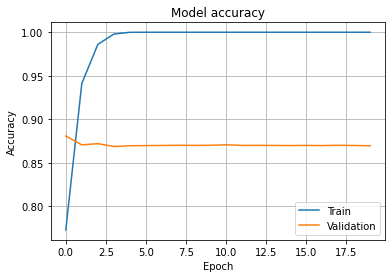

In [8]:
# 모델 평가
res=embed.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

# 학습 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

In [9]:
x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [10]:
# Function to one-hot encode a sequence of integers
def one_hot_encode(sequence, vocab_size):
    one_hot = np.zeros((len(sequence), vocab_size))
    for i, word_index in enumerate(sequence):
        one_hot[i, word_index] = 1
    return one_hot


# One-hot encode the input data
one_hot_x_train = np.array([one_hot_encode(seq, dic_siz) for seq in x_train])
one_hot_x_test = np.array([one_hot_encode(seq, dic_siz) for seq in x_test])

# 신경망 모델 설계와 학습
model=Sequential()
# model.add(Embedding(input_dim=dic_siz,output_dim=embed_space_dim,input_length=sample_siz))
model.add(Dense(embed_space_dim, input_shape=(sample_siz, dic_siz), use_bias=False))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
hist=model.fit(one_hot_x_train,y_train,epochs=20,batch_size=64,validation_data=(one_hot_x_test,y_test),verbose=2)

model.summary()

Epoch 1/20
1/1 - 2s - loss: 0.6939 - accuracy: 0.4400 - val_loss: 0.6992 - val_accuracy: 0.4600 - 2s/epoch - 2s/step
Epoch 2/20
1/1 - 0s - loss: 0.6688 - accuracy: 0.7000 - val_loss: 0.7093 - val_accuracy: 0.4600 - 191ms/epoch - 191ms/step
Epoch 3/20
1/1 - 0s - loss: 0.6477 - accuracy: 0.7000 - val_loss: 0.7249 - val_accuracy: 0.4600 - 201ms/epoch - 201ms/step
Epoch 4/20
1/1 - 0s - loss: 0.6292 - accuracy: 0.7000 - val_loss: 0.7440 - val_accuracy: 0.4600 - 203ms/epoch - 203ms/step
Epoch 5/20
1/1 - 0s - loss: 0.6136 - accuracy: 0.7000 - val_loss: 0.7574 - val_accuracy: 0.4600 - 193ms/epoch - 193ms/step
Epoch 6/20
1/1 - 0s - loss: 0.5984 - accuracy: 0.7000 - val_loss: 0.7610 - val_accuracy: 0.4600 - 192ms/epoch - 192ms/step
Epoch 7/20
1/1 - 0s - loss: 0.5807 - accuracy: 0.7200 - val_loss: 0.7563 - val_accuracy: 0.4600 - 201ms/epoch - 201ms/step
Epoch 8/20
1/1 - 0s - loss: 0.5602 - accuracy: 0.7200 - val_loss: 0.7481 - val_accuracy: 0.4600 - 188ms/epoch - 188ms/step
Epoch 9/20
1/1 - 0s - 

정확률은 51.99999809265137


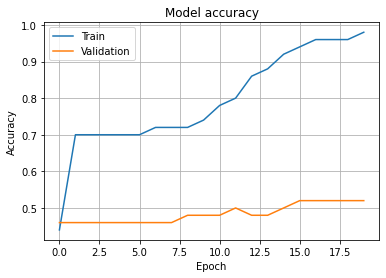

In [11]:
# 모델 평가
res=model.evaluate(one_hot_x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

# 학습 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

## Program 8-8 LSTM with Early Stopping

In [9]:
early=EarlyStopping(monitor='val_accuracy',patience=5,restore_best_weights=True)

# 신경망 모델의 설계와 학습(LSTM 층 포함)
embed=Sequential()
embed.add(Embedding(input_dim=dic_siz,output_dim=embed_space_dim,input_length=sample_siz))
embed.add(LSTM(units=32))
embed.add(Dense(1,activation='sigmoid'))
embed.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
hist=embed.fit(x_train,y_train,epochs=20,batch_size=64,validation_split=0.2,verbose=2,callbacks=[early])

Epoch 1/20
313/313 - 116s - loss: 0.4859 - accuracy: 0.7629 - val_loss: 0.3441 - val_accuracy: 0.8602 - 116s/epoch - 372ms/step
Epoch 2/20
313/313 - 115s - loss: 0.2631 - accuracy: 0.8974 - val_loss: 0.2846 - val_accuracy: 0.8854 - 115s/epoch - 368ms/step
Epoch 3/20
313/313 - 115s - loss: 0.1870 - accuracy: 0.9337 - val_loss: 0.3090 - val_accuracy: 0.8812 - 115s/epoch - 369ms/step
Epoch 4/20
313/313 - 115s - loss: 0.1538 - accuracy: 0.9457 - val_loss: 0.3351 - val_accuracy: 0.8784 - 115s/epoch - 369ms/step
Epoch 5/20
313/313 - 115s - loss: 0.1145 - accuracy: 0.9624 - val_loss: 0.3769 - val_accuracy: 0.8772 - 115s/epoch - 368ms/step
Epoch 6/20
313/313 - 115s - loss: 0.1586 - accuracy: 0.9391 - val_loss: 0.3758 - val_accuracy: 0.8726 - 115s/epoch - 369ms/step
Epoch 7/20
313/313 - 116s - loss: 0.0883 - accuracy: 0.9720 - val_loss: 0.3987 - val_accuracy: 0.8714 - 116s/epoch - 369ms/step


In [ ]:
# 모델 평가
res=embed.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 학습 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

정확률은 87.87599802017212
